In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
import chart_studio.plotly as py
import seaborn as sns
%matplotlib inline
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,place,pop2022,growthRate,area,country,cca3,cca2,ccn3,region,subregion,...,density,densityMi,Rank,rate2019male,rate2019female,rate2019both,rate2015male,rate2015female,rate2015both,rank
426,2305825.0,0.01068,30355,Lesotho,LSO,LS,426,Africa,Southern Africa,Sub-Saharan Africa,...,75.9494,196.7090,147.0,116.0,30.1,72.4,147,39,92,1.0
328,808726.0,0.00517,214969,Guyana,GUY,GY,328,South America,South America,Latin America,...,4.1083,10.6406,164.0,63.0,17.4,40.3,58,16,37,2.0
748,1201670.0,0.00788,17364,Eswatini,SWZ,SZ,748,Africa,Southern Africa,Sub-Saharan Africa,...,69.8645,180.9491,159.0,55.1,4.7,29.4,62,9,35,3.0
410,51815810.0,-0.00028,100210,South Korea,KOR,KR,410,Asia,Eastern Asia,97600,...,1375.0302,29.0000,40.2,16.9,28.6,39.0,16,28,4,NaN
296,131232.0,0.01830,811,Kiribati,KIR,KI,296,Oceania,Micronesia,810,...,419.6184,192.0000,48.6,8.7,28.3,50.0,9,29,5,NaN


In [4]:
col = df.columns.tolist()
df=df.reset_index(drop=False)

In [5]:
df.columns = col + ['x']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   place           179 non-null    int64  
 1   pop2022         179 non-null    float64
 2   growthRate      179 non-null    float64
 3   area            179 non-null    int64  
 4   country         179 non-null    object 
 5   cca3            179 non-null    object 
 6   cca2            178 non-null    object 
 7   ccn3            179 non-null    int64  
 8   region          179 non-null    object 
 9   subregion       179 non-null    object 
 10  landAreaKm      179 non-null    object 
 11  density         179 non-null    float64
 12  densityMi       179 non-null    float64
 13  Rank            179 non-null    float64
 14  rate2019male    179 non-null    float64
 15  rate2019female  179 non-null    float64
 16  rate2019both    179 non-null    float64
 17  rate2015male    179 non-null    flo

In [7]:
print(df['subregion'].unique().tolist())
print(df['landAreaKm'].unique().tolist())

['Southern Africa', 'South America', 'Eastern Asia', 'Micronesia', 'Northern Europe', 'Eastern Europe', 'Southern Europe', 'Western Europe', 'Melanesia', 'Central Asia', 'Northern America', 'Caribbean', 'Eastern Africa', 'Southern Asia', 'Polynesia', 'Australia and New Zealand', 'Middle Africa', 'South-Eastern Asia', 'Western Asia', 'Western Africa', 'Central America', 'Northern Africa', 'South Central Asia']
['Sub-Saharan Africa', 'Latin America', '97600', '810', '700', '62620', '16376870', '579400', '202980', '13450', '62230', '20136.4', '30280', '12190', '1557506.8', '2699700', '91260', '55960', '9147420', '364500', '303940', '42750', '407283.5', '32884.6', '27990', '82520', '103800', '39516', 'South Central Asia', '547557', '2780', '7692020', '349390', '49035', '100830', '8965590', '33670', '364285', '91605.6', '87460', '306130', '2574.5', '718', '263310', '51200', '40000', '230080', '108560', '27560', '68890', '120410', '25220', '69490', '18270', 'The Middle East', '510890', '5130

In [8]:
for i in range(len(df)):
    if 'a' in df.iloc[i,10]: #'landAreaKm'
        df.iloc[i,10:21]=df.iloc[i,11:22]
df['landAreaKm']=df['landAreaKm'].astype(float)

In [9]:
df.head(5)

,place,pop2022,growthRate,area,country,cca3,cca2,ccn3,region,subregion,...,densityMi,Rank,rate2019male,rate2019female,rate2019both,rate2015male,rate2015female,rate2015both,rank,x
0,426,2305825.0,0.01068,30355,Lesotho,LSO,LS,426,Africa,Southern Africa,...,196.7090,147.0,116.0,30.1,72.4,147.0,39,92,1,1.0
1,328,808726.0,0.00517,214969,Guyana,GUY,GY,328,South America,South America,...,10.6406,164.0,63.0,17.4,40.3,58.0,16,37,2,2.0
2,748,1201670.0,0.00788,17364,Eswatini,SWZ,SZ,748,Africa,Southern Africa,...,180.9491,159.0,55.1,4.7,29.4,62.0,9,35,3,3.0
3,410,51815810.0,-0.00028,100210,South Korea,KOR,KR,410,Asia,Eastern Asia,...,1375.0302,29.0,40.2,16.9,28.6,39.0,16,28,4,NaN
4,296,131232.0,0.01830,811,Kiribati,KIR,KI,296,Oceania,Micronesia,...,419.6184,192.0,48.6,8.7,28.3,50.0,9,29,5,NaN


In [10]:
df.drop('x',axis=1, inplace=True)

In [11]:
df.describe()

,place,pop2022,growthRate,area,ccn3,landAreaKm,density,densityMi,Rank,rate2019male,rate2019female,rate2019both,rate2015male,rate2015female,rate2015both,rank
count,179.000000,1.790000e+02,179.000000,1.790000e+02,179.000000,1.790000e+02,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,432.223464,4.406868e+07,0.010976,7.420734e+05,432.223464,7.200937e+05,206.872856,535.800701,94.324022,14.678212,4.372626,9.478771,15.229050,4.307263,9.748603,90.000000
std,255.224412,1.550831e+08,0.014019,1.981464e+06,255.224412,1.903359e+06,665.014692,1722.388057,56.185148,13.216496,3.559917,8.049698,15.399476,4.064163,9.398089,51.816986
min,4.000000,9.376300e+04,-0.087980,3.000000e+02,4.000000,3.000000e+02,2.181900,5.651200,1.000000,0.000000,0.300000,0.400000,0.000000,0.000000,0.000000,1.000000
25%,216.000000,2.728024e+06,0.003835,3.004900e+04,216.000000,2.829500e+04,31.552650,81.721300,45.500000,6.700000,2.000000,4.600000,7.000000,2.000000,4.000000,45.500000
50%,426.000000,1.014262e+07,0.010290,1.475700e+05,426.000000,1.433500e+05,83.011800,215.000500,93.000000,11.300000,3.300000,7.500000,11.000000,3.000000,7.000000,90.000000
75%,654.000000,3.381742e+07,0.019350,5.845205e+05,654.000000,5.742700e+05,183.079150,474.175000,141.500000,17.750000,6.150000,11.800000,19.000000,6.000000,12.500000,134.500000
max,894.000000,1.425887e+09,0.069080,1.709824e+07,894.000000,1.637687e+07,8322.686600,21555.758400,201.000000,116.000000,30.100000,72.400000,147.000000,39.000000,92.000000,179.000000


<AxesSubplot:>

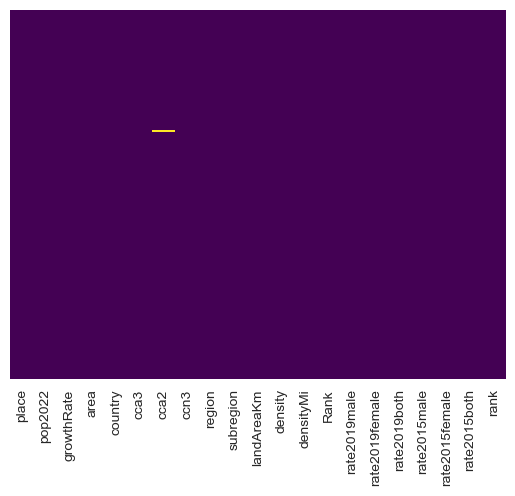

In [12]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False, cmap='viridis')

In [13]:
df.columns

Index(['place', 'pop2022', 'growthRate', 'area', 'country', 'cca3', 'cca2',
       'ccn3', 'region', 'subregion', 'landAreaKm', 'density', 'densityMi',
       'Rank', 'rate2019male', 'rate2019female', 'rate2019both',
       'rate2015male', 'rate2015female', 'rate2015both', 'rank'],
      dtype='object')

In [14]:
np.where(df['cca2'].isna())

(array([58]),)

In [15]:
df['cca2'].iloc[58],df['country'].iloc[58],df['ccn3'].iloc[58]

(nan, 'Namibia', 516)

cca2 is ISO 3166-1 alpha-2 codes are two-letter country codes defined in ISO 3166-1, part of the ISO 3166 standard[1] published by the International Organization for Standardization (ISO), to represent countries, dependent territories, and special areas of geographical interest. 

Filling the missing value in cca2 column

In [16]:
df['cca2'].fillna(value='NA',inplace=True)

<AxesSubplot:>

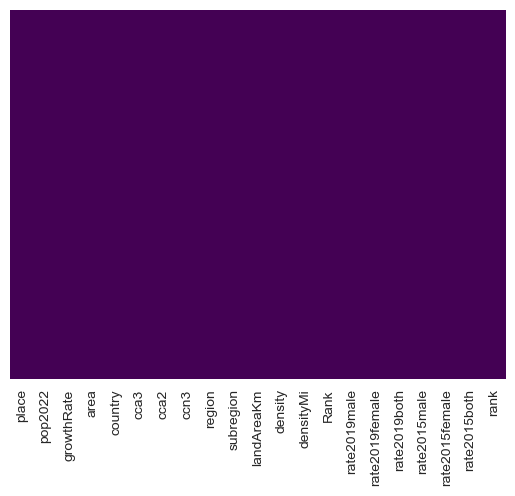

In [17]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False, cmap='viridis')

## EDA

### Male suicide rate in 2019

<AxesSubplot:xlabel='rate2019male', ylabel='Count'>

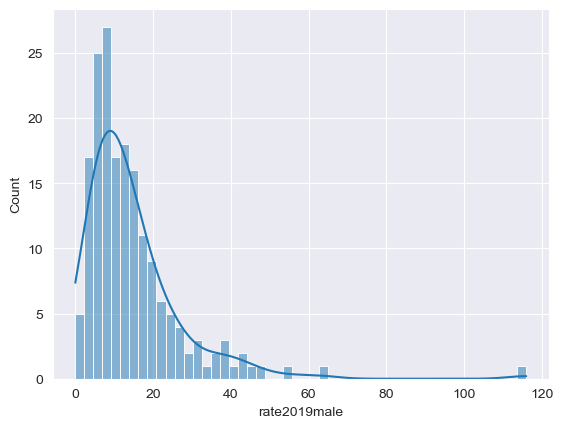

In [18]:
sns.histplot(x='rate2019male',bins=50,data=df,kde=True)

In [19]:
data = dict(
    type='choropleth', locations=df['cca3'],
    z= df['rate2019male'],
    text = df['country'],
    colorbar={'title':'Suicide rate(2019)'}
)
layout = dict(title = 'Male suicide rate(2019)',
geo = dict(showframe =  True))
choromap1 = go.Figure(data= [data],layout=layout)
iplot(choromap1)

<AxesSubplot:ylabel='rate2019male'>

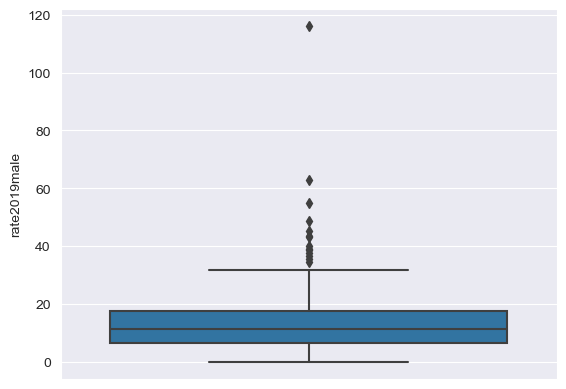

In [20]:
sns.boxplot(y='rate2019male',data = df)

So, there are some outliers in the male suicide rate data. Let's find out the correspnding countries 

In [21]:
# Upper and lower bound
q1 = df['rate2019male'].quantile(0.25)
q3 = df['rate2019male'].quantile(0.75)
iqr = q3-q1
lower_lim_m = q1-1.5*iqr
upper_lim_m = q3+1.5*iqr

In [22]:
high_mcrate = df[df['rate2019male']>upper_lim_m]['rate2019male'].values
countries_high_mcrate = df[df['rate2019male']>upper_lim_m]['cca3'].to_list()
country_m = df[df['rate2019male']>upper_lim_m]['country'].to_list()


In [23]:
data = dict(
    type='choropleth', locations=countries_high_mcrate,
    z= high_mcrate,
    text = country_m,
    colorbar={'title':'Male suicide rate(2019)'}
)
layout = dict(title = 'Countries with higher male suicide rate(2019)',
geo = dict(showframe =  True))
choromap2 = go.Figure(data= [data],layout=layout)
iplot(choromap2)

### Female suicide rate in 2019

<AxesSubplot:xlabel='rate2019female', ylabel='Count'>

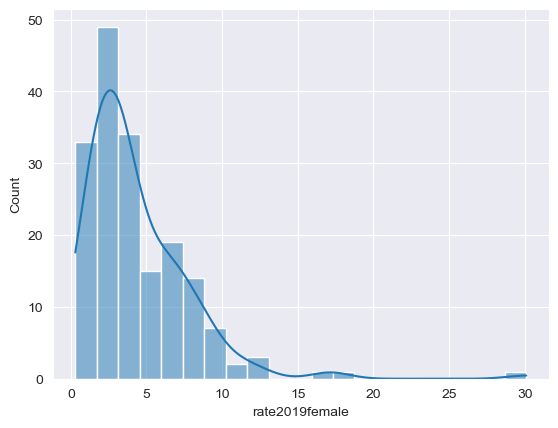

In [24]:
sns.histplot(x='rate2019female',data=df,kde=True)

In [25]:
data = dict(
    type='choropleth', locations=df['cca3'],
    z= df['rate2019female'],
    text = df['country'],
    colorbar={'title':'suicide rate(2019)'}
)
layout = dict(title = 'Female suicide rate(2019)',
geo = dict(showframe =  True))
choromap3 = go.Figure(data= [data],layout=layout)
iplot(choromap3)

<AxesSubplot:ylabel='rate2019female'>

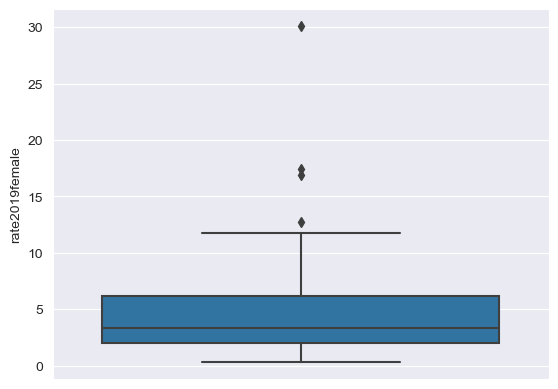

In [26]:
sns.boxplot(y='rate2019female',data = df)

In [27]:
q1 = df['rate2019female'].quantile(0.25)
q3 = df['rate2019female'].quantile(0.75)
iqr = q3-q1
lower_lim_f = q1-1.5*iqr
upper_lim_f = q3+1.5*iqr

In [28]:
high_fcrate = df[df['rate2019female']>upper_lim_f]['rate2019female'].values
countries_high_fcrate = df[df['rate2019female']>upper_lim_f]['cca3'].to_list()
country_f = df[df['rate2019female']>upper_lim_f]['country'].to_list()


In [29]:
data = dict(
    type='choropleth', locations=countries_high_fcrate,
    z= high_fcrate,
    text = country_f,
    colorbar={'title':'Female suicide rate(2019)'}
)
layout = dict(title = 'Countries with higher female suicide rate(2019)',
geo = dict(showframe =  True))
choromap4 = go.Figure(data= [data],layout=layout)
iplot(choromap4)

EDA for both data 

<AxesSubplot:xlabel='rate2019both', ylabel='Count'>

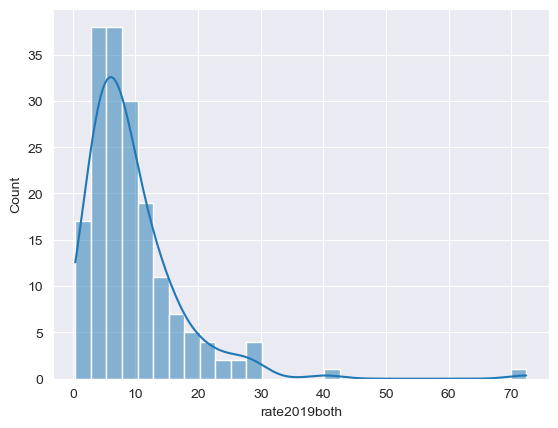

In [30]:

sns.histplot(x='rate2019both',data=df,kde=True)

In [31]:
data = dict(
    type='choropleth', locations=df['cca3'],
    z= df['rate2019both'],
    text = df['country'],
    colorbar={'title':'suicide rate(2019)'}
)
layout = dict(title = 'Suicide rate(2019)',
geo = dict(showframe =  True))
choromap5 = go.Figure(data= [data],layout=layout)
iplot(choromap5)

In [32]:
q1 = df['rate2019both'].quantile(0.25)
q3 = df['rate2019both'].quantile(0.75)
iqr = q3-q1
lower_lim = q1-1.5*iqr
upper_lim = q3+1.5*iqr

In [33]:
high_crate = df[df['rate2019both']>upper_lim]['rate2019both'].values
countries_high_crate = df[df['rate2019both']>upper_lim]['cca3'].to_list()
country= df[df['rate2019both']>upper_lim]['country'].to_list()


In [34]:
data = dict(
    type='choropleth', locations=countries_high_crate,
    z= high_crate,
    text = country,
    colorbar={'title':'Suicide rate(2019)'}
)
layout = dict(title = 'Countries with higher suicide rate(2019)',
geo = dict(showframe =  True))
choromap6 = go.Figure(data= [data],layout=layout)
iplot(choromap6)

In [35]:
data = dict(
    type='choropleth', locations=df['cca3'],
    z= df['rank'],
    text = df['country'],
    colorbar={'title':'rank'}
)
layout = dict(title = 'Suicide rate(2019)',
geo = dict(showframe =  True))
choromap7 = go.Figure(data= [data],layout=layout)
iplot(choromap7)

In [36]:
df.groupby(by='region')['rate2019both'].median()

region
Africa            6.65
Asia              5.70
Europe           11.90
North America     5.30
Oceania          12.55
South America     7.25
Name: rate2019both, dtype: float64